In [1]:
import pandas as pd
import numpy as np
import itertools
import random
from typing import List, Tuple, Dict
from datetime import datetime, timedelta
import time
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
russel_1000 = pd.read_html('https://en.wikipedia.org/wiki/Russell_1000_Index')[3]
russel_1000['Symbol'] = [s.replace('.', '-') for s in russel_1000['Symbol']]
russel_1000_tickers = list(russel_1000['Symbol'])

In [4]:
sp_500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp_500['Symbol'] = [s.replace('.', '-') for s in sp_500['Symbol']]
sp_500_tickers = list(sp_500['Symbol'])

In [5]:
prices = yf.download(sp_500_tickers, period = '20y')['Close'].dropna(axis = 1, how = 'any')
prices

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed


Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WSM,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2005-04-12,12.842957,1.283792,14.460258,4.344550,16.617758,33.450001,21.838957,13.544513,22.129673,33.970001,...,11.584615,10.329933,61.876358,13.292465,34.831192,8.254734,30.987862,12.701365,66.767052,46.490002
2005-04-13,12.512264,1.235041,14.586265,4.358284,16.390892,32.535000,21.320015,13.389257,22.095161,32.820000,...,11.397967,10.051420,60.963928,13.090844,34.982410,8.226143,30.331486,12.602032,66.289352,45.869999
2005-04-14,12.428090,1.121287,14.662176,4.284327,16.206572,31.740000,21.038671,13.463783,21.947269,31.670000,...,11.217764,9.839420,59.983932,12.864944,33.572754,8.140351,30.126368,12.579688,66.211182,44.630001
2005-04-15,12.265744,1.063809,15.141904,4.258969,15.951351,30.330000,20.532248,12.904863,21.424725,31.660000,...,10.831610,9.806165,60.406353,12.353405,32.308907,8.068858,28.813618,12.467944,67.305420,44.490002
2005-04-18,12.428090,1.071934,14.871671,4.231498,16.000973,27.385000,20.857361,12.563299,21.375427,31.690001,...,11.156624,9.764397,59.645969,12.289933,31.925430,8.102225,29.357187,12.366135,66.671494,45.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,103.589996,181.460007,124.860001,84.989998,284.720001,340.700012,171.339996,42.980000,281.220001,243.619995,...,145.089996,201.470001,301.010010,25.480000,67.930000,67.059998,102.940002,144.929993,104.839996,223.490005
2025-04-08,99.290001,172.419998,123.949997,86.419998,281.390015,340.000000,166.089996,41.790001,276.760010,238.839996,...,139.210007,190.389999,302.059998,24.820000,66.099998,67.040001,100.769997,141.380005,102.790001,213.539993
2025-04-09,107.050003,198.850006,127.040001,91.480003,299.940002,364.640015,196.630005,44.380001,294.690002,263.529999,...,158.250000,203.529999,314.809998,26.559999,75.830002,68.580002,105.800003,145.449997,103.440002,243.770004


In [6]:
returns = prices.pct_change(fill_method=None)
returns

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WSM,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2005-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-13,-0.025749,-0.037974,0.008714,0.003161,-0.013652,-0.027354,-0.023762,-0.011463,-0.001560,-0.033853,...,-0.016112,-0.026962,-0.014746,-0.015168,0.004341,-0.003464,-0.021182,-0.007821,-0.007155,-0.013336
2005-04-14,-0.006727,-0.092105,0.005204,-0.016970,-0.011245,-0.024435,-0.013196,0.005566,-0.006693,-0.035040,...,-0.015810,-0.021092,-0.016075,-0.017256,-0.040296,-0.010429,-0.006763,-0.001773,-0.001179,-0.027033
2005-04-15,-0.013063,-0.051261,0.032719,-0.005919,-0.015748,-0.044423,-0.024071,-0.041513,-0.023809,-0.000316,...,-0.034423,-0.003380,0.007042,-0.039762,-0.037645,-0.008783,-0.043575,-0.008883,0.016526,-0.003137
2005-04-18,0.013236,0.007638,-0.017847,-0.006450,0.003111,-0.097099,0.015834,-0.026468,-0.002301,0.000948,...,0.030006,-0.004259,-0.012588,-0.005138,-0.011869,0.004135,0.018865,-0.008166,-0.009419,0.023151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,0.005728,-0.036734,0.003375,-0.032335,-0.001193,-0.023978,0.040948,-0.007849,-0.017160,-0.007698,...,0.024068,-0.008563,-0.025227,-0.029703,-0.030817,-0.012226,-0.013418,-0.019617,-0.023290,0.000000
2025-04-08,-0.041510,-0.049818,-0.007288,0.016826,-0.011696,-0.002055,-0.030641,-0.027687,-0.015859,-0.019621,...,-0.040526,-0.054996,0.003488,-0.025903,-0.026940,-0.000298,-0.021080,-0.024495,-0.019554,-0.044521
2025-04-09,0.078155,0.153289,0.024929,0.058551,0.065923,0.072471,0.183876,0.061977,0.064785,0.103375,...,0.136772,0.069016,0.042210,0.070105,0.147201,0.022971,0.049916,0.028788,0.006324,0.141566


In [7]:
def pick_stocks(corr_matrix: pd.DataFrame, num_stocks: int, corr_type: str, balance_factor: float = 0.4):
    """
    Pick a given number of stocks from the S&P 500 based on their pairwise correlations.

    Parameters:
        corr_matrix (pd.DataFrame): Correlation matrix with stock tickers as index and columns.
        num_stocks (int): The number of stocks to select.
        corr_type (str): One of 'high', 'mid', 'low', or 'mixed'.
                         - 'high': stocks must have pairwise correlation >= threshold.
                         - 'mid': stocks must have pairwise correlation within a mid-range.
                         - 'low': stocks must have pairwise correlation <= threshold.
                         - 'mixed': stocks are selected to create a balanced mix of high and low correlations.
        balance_factor (float): For 'mixed' type, the target proportion of high correlation pairs (0.0-1.0).
                                Default is 0.4 (40% high correlations, 60% low correlations).

    Returns:
        list: A list of stock tickers meeting the criteria, or an empty list if no valid group is found.
        dict: For 'mixed' type, returns additional statistics about the correlations.
    """
    # Set thresholds and conditions
    if corr_type == 'high':
        threshold = 0.7
        condition = lambda x: x >= threshold
    elif corr_type == 'low':
        threshold = 0.3
        condition = lambda x: x <= threshold
    elif corr_type == 'mid':
        lower_threshold = 0.3
        upper_threshold = 0.7
        condition = lambda x: lower_threshold <= x <= upper_threshold
    elif corr_type == 'mixed':
        low_threshold = 0.3
        high_threshold = 0.7
        # For mixed, every pair between the candidate and group must be at an extreme
        condition = lambda x: x <= low_threshold or x >= high_threshold
    else:
        raise ValueError("corr_type must be 'high', 'mid', 'low', or 'mixed'")

    tickers = list(corr_matrix.columns)

    # Helper function to check if a candidate stock meets the condition with every stock in the current group
    def is_valid_addition(group, candidate):
        for stock in group:
            corr = corr_matrix.loc[stock, candidate]
            if corr_type == 'mixed':
                if not (corr <= low_threshold or corr >= high_threshold):
                    return False
            else:
                if not condition(corr):
                    return False
        return True

    # For mixed correlations, calculate statistics about the correlation distribution
    def get_correlation_stats(group):
        if len(group) < 2:
            return {"high_ratio": 0, "low_ratio": 0, "total_pairs": 0}

        pairs = list(itertools.combinations(group, 2))
        correlations = [corr_matrix.loc[s1, s2] for s1, s2 in pairs]

        high_count = sum(1 for c in correlations if c >= high_threshold)
        low_count = sum(1 for c in correlations if c <= low_threshold)
        mid_count = len(correlations) - high_count - low_count

        return {
            "high_count": high_count,
            "low_count": low_count,
            "mid_count": mid_count,
            "high_ratio": high_count / len(correlations) if correlations else 0,
            "low_ratio": low_count / len(correlations) if correlations else 0,
            "total_pairs": len(correlations)
        }

    # Score a group based on how well it matches our desired balance of correlations
    def score_mixed_group(group):
        stats = get_correlation_stats(group)

        # If we don't have both high and low correlations, give a poor score
        if stats["high_count"] == 0 or stats["low_count"] == 0:
            return -1000

        # Calculate how close the actual high ratio is to our target balance factor
        balance_score = -abs(stats["high_ratio"] - balance_factor) * 10

        # Also favor groups with more extreme correlations (fewer mid-range correlations)
        extremeness_score = -stats["mid_count"] * 2

        return balance_score + extremeness_score

    # For mixed type, we'll use a more sophisticated approach to find balanced groups
    if corr_type == 'mixed':
        # Try multiple random seeds to increase chances of finding a good group
        best_group = []
        best_score = float('-inf')
        best_stats = {}

        # Number of random seeds to try
        num_attempts = min(50, len(tickers))
        seed_tickers = random.sample(tickers, num_attempts)

        for seed in seed_tickers:
            # Start with this seed ticker
            group = [seed]

            # Track candidates that could potentially be added
            valid_candidates = [t for t in tickers if t != seed and is_valid_addition(group, t)]

            # Greedily add stocks that meet our conditions
            while len(group) < num_stocks and valid_candidates:
                # Try each candidate and see which one gives the best balance
                best_candidate = None
                best_candidate_score = float('-inf')

                for candidate in valid_candidates[:]:
                    # Create a test group with this candidate
                    test_group = group + [candidate]

                    # If we're at the final size, score based on correlation balance
                    if len(test_group) == num_stocks:
                        score = score_mixed_group(test_group)
                        if score > best_candidate_score:
                            best_candidate = candidate
                            best_candidate_score = score
                    else:
                        # Otherwise, prefer candidates that keep more options open
                        remaining = [t for t in tickers if t not in test_group and is_valid_addition(test_group, t)]
                        score = len(remaining)
                        if score > best_candidate_score:
                            best_candidate = candidate
                            best_candidate_score = score

                if best_candidate:
                    group.append(best_candidate)
                    # Update valid candidates for the next round
                    valid_candidates = [t for t in tickers if t not in group and is_valid_addition(group, t)]
                else:
                    # No valid candidates left
                    break

            # Score the final group
            if len(group) == num_stocks:
                score = score_mixed_group(group)
                stats = get_correlation_stats(group)

                if score > best_score:
                    best_group = group
                    best_score = score
                    best_stats = stats

        if best_group:
            return best_group, best_stats
        return [], {}

    # For non-mixed types, use the original algorithm
    for seed in tickers:
        group = [seed]
        candidates = [t for t in tickers if t != seed]

        while len(group) < num_stocks and candidates:
            for candidate in candidates[:]:
                if is_valid_addition(group, candidate):
                    group.append(candidate)
                    candidates.remove(candidate)
                    break
                else:
                    candidates.remove(candidate)

            if len(group) == num_stocks:
                return group, {}

    return [], {}

In [8]:
high_corr__tickers = pick_stocks(returns.corr(), 10, 'high')
mixed_corr_tickers = pick_stocks(returns.corr(), 10, 'mixed')
low_corr_tickers = pick_stocks(returns.corr(), 10, 'low')

print(high_corr__tickers[0])
print(mixed_corr_tickers[0])
print(low_corr_tickers[0])

['AEE', 'AEP', 'CMS', 'D', 'DTE', 'DUK', 'ED', 'ES', 'EVRG', 'LNT']
['XOM', 'MNST', 'PCG', 'TKO', 'DLTR', 'DVN', 'OXY', 'COP', 'EOG', 'CVX']
['AAPL', 'AEE', 'AIG', 'BIIB', 'CNC', 'DLTR', 'DPZ', 'DVA', 'KR', 'NEM']


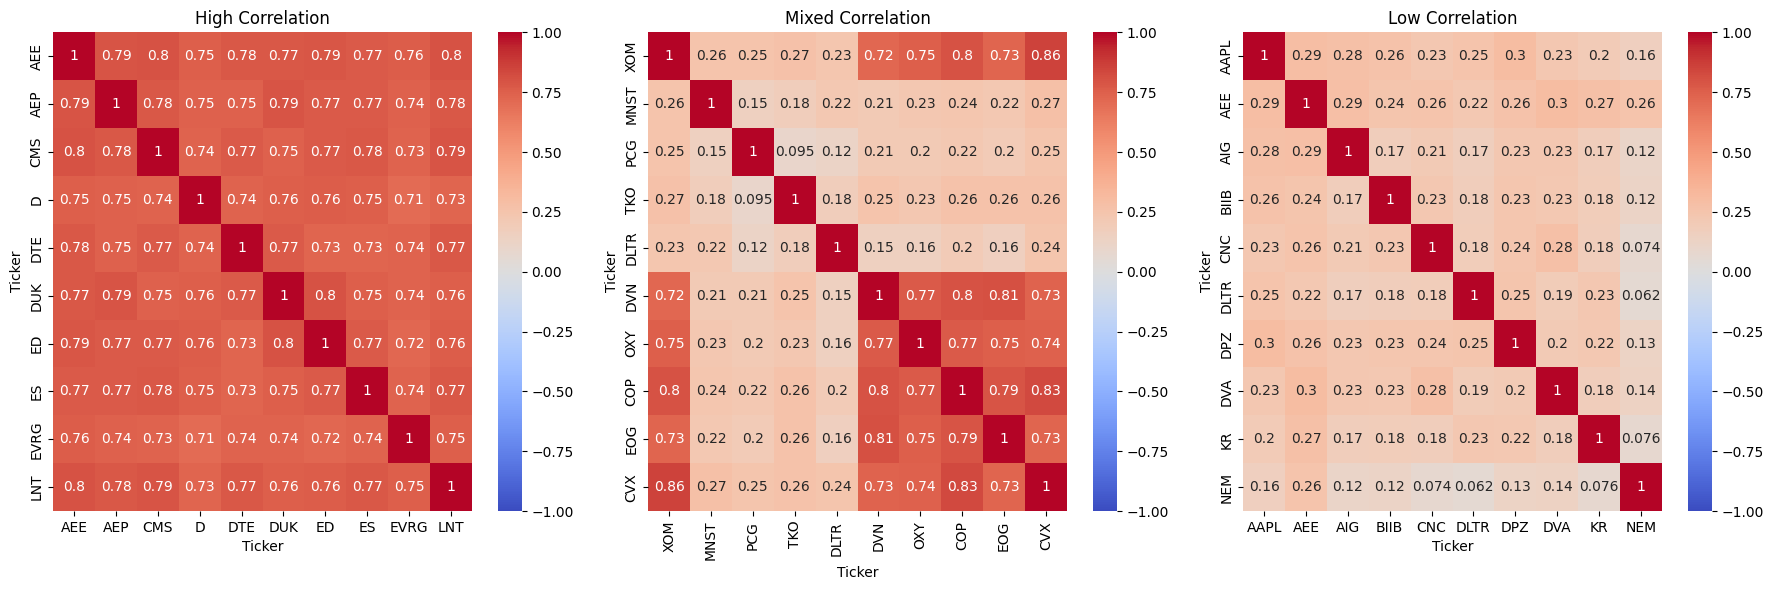

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(returns[high_corr__tickers[0]].corr(), annot=True, ax=axes[0], cmap="coolwarm", vmin=-1, vmax=1)
axes[0].set_title("High Correlation")

sns.heatmap(returns[mixed_corr_tickers[0]].corr(), annot=True, ax=axes[1], cmap="coolwarm", vmin=-1, vmax=1)
axes[1].set_title("Mixed Correlation")

sns.heatmap(returns[low_corr_tickers[0]].corr(), annot=True, ax=axes[2], cmap="coolwarm", vmin=-1, vmax=1)
axes[2].set_title("Low Correlation")

plt.tight_layout()
plt.show()

In [20]:
selected_tickers = pd.DataFrame({"Low correlation": [ticker + " US Equity" for ticker in low_corr_tickers[0]],
                                 "Mixed correlation": [ticker + " US Equity" for ticker in mixed_corr_tickers[0]],
                                 "High correlation": [ticker + " US Equity" for ticker in high_corr__tickers[0]]
                                 })
selected_tickers.to_excel("../selected_tickers.xlsx", index = False)